# Purpose

This shows the improvement because of our thing. It's the big cahuna.

### Method

I did 3 very large runs. Pretraining for 200 for each, and then training against
critic with one, other, and both critic-counts missing.

We'll show the grahs over epochs. We'll also show the training critic-loss, to see how well it can fit that curve.

### Data structure

Each of the files is a JSON object. Its keys are the 3 training phases: ACTOR, CRITIC, and AC.
Underneath this, it has subfields for what it was recording. For example, NDCG, or TRAINING_CRITIC_ERROR.

### Conclusions

It seems as though BOTH_COUNTS is BEST, NO_COUNTS is WORST, WITHOUT_SEEN is pretty good, and WITHOUT_UNSEEN is pretty bad.

My guess at reasons:

* The magnitude of the NLL is probably a pretty good proxy for num_seen, because 


In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set()

DATA = {}
DATA['ml-20m'] = {}
DATA['ml-20m']['VAE'] = {}
DATA['netflix-prize'] = {}
DATA['netflix-prize']['VAE'] = {}

# DATA['without_seen'] = {}
# DATA['without_unseen'] = {}
# DATA['tentative_with_both'] = {}

print("Now, loading data")

with open("./data/ml-20m/VAE/actor_training.json", "r") as f:
    DATA['ml-20m']['VAE']['actor'] = json.loads(f.read())

with open("./data/ml-20m/VAE/critic_training.json", "r") as f:
    DATA['ml-20m']['VAE']['critic'] = json.loads(f.read())

with open("./data/ml-20m/VAE/warp_critic_training.json", "r") as f:
    DATA['ml-20m']['VAE']['warp_critic'] = json.loads(f.read())

with open("./data/ml-20m/VAE/lambdarank_critic_training.json", "r") as f:
    DATA['ml-20m']['VAE']['lambdarank_critic'] = json.loads(f.read())
    
with open("./data/netflix-prize/VAE/actor_training.json", "r") as f:
    DATA['netflix-prize']['VAE']['actor'] = json.loads(f.read())

with open("./data/netflix-prize/VAE/critic_training.json", "r") as f:
    DATA['netflix-prize']['VAE']['critic'] = json.loads(f.read())

with open("./data/netflix-prize/VAE/warp_critic_training.json", "r") as f:
    DATA['netflix-prize']['VAE']['warp_critic'] = json.loads(f.read())

with open("./data/netflix-prize/VAE/lambdarank_critic_training.json", "r") as f:
    DATA['netflix-prize']['VAE']['lambdarank_critic'] = json.loads(f.read())
    
# with open("./data/without_seen/actor_training.json", "r") as f:
#     DATA['without_seen']['actor'] = json.loads(f.read())

# with open("./data/without_seen/critic_training.json", "r") as f:
#     DATA['without_seen']['critic'] = json.loads(f.read())

# with open("./data/without_unseen/actor_training.json", "r") as f:
#     DATA['without_unseen']['actor'] = json.loads(f.read())

# with open("./data/without_unseen/critic_training.json", "r") as f:
#     DATA['without_unseen']['critic'] = json.loads(f.read())

# with open("./data/tentative_with_both/actor_training.json", "r") as f:
#     DATA['tentative_with_both']['actor'] = json.loads(f.read())

# with open("./data/tentative_with_both/critic_training.json", "r") as f:
#     DATA['tentative_with_both']['critic'] = json.loads(f.read())
    
print("Data loaded")

    


Now, loading data
Data loaded


First, we'll plot just the actor


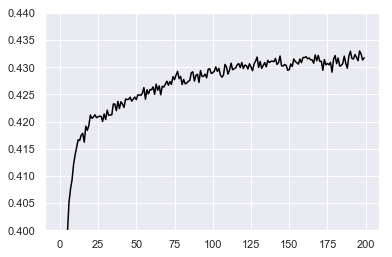

In [4]:
print("First, we'll plot just the actor")
# https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

plt.clf()
plt.plot(range(200), DATA['ml-20m']['VAE']['actor']['ACTOR']['ndcg'], color="black")
# plt.plot(range(200), DATA['without_seen']['actor']['ACTOR']['ndcg'], color="blue")
# plt.plot(range(200), DATA['without_unseen']['actor']['ACTOR']['ndcg'], color="green")
# plt.plot(range(200), DATA['tentative_with_both']['actor']['ACTOR']['ndcg'], color="orange")
plt.ylim(0.40, 0.44)
plt.show()



Now we'll add the critic to the end


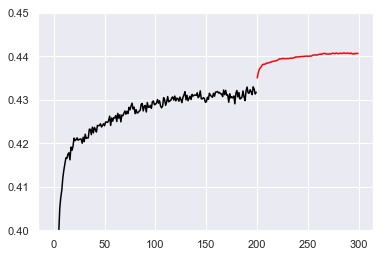

In [5]:
print("Now we'll add the critic to the end")

plt.clf()
plt.plot(range(200), DATA['ml-20m']['VAE']['actor']['ACTOR']['ndcg'], color="black")
plt.plot(range(200, 300), DATA['ml-20m']['VAE']['critic']['AC']['ndcg'], color="red")

plt.ylim(0.40, 0.45)
plt.show()


Now we'll add the critic coming off the center


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


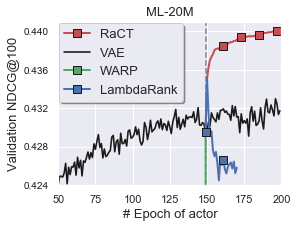

In [6]:
print("Now we'll add the critic coming off the center")

stride = 12 # max( int(len(accuracy_a) / 8), 1)

fig=plt.figure(figsize=(4,3))

LAMBDARANK_DATA = DATA['ml-20m']['VAE']['lambdarank_critic']['ALTERNATIVE_ERROR']['ndcg']

plt.axvline(x=149, linewidth=1.5, color='gray', linestyle="--")
plt.plot(range(149, 200), [DATA['ml-20m']['VAE']['actor']['ACTOR']['ndcg'][150]] + DATA['ml-20m']['VAE']['critic']['AC']['ndcg'][:50],  label='RaCT', marker= 's', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)
plt.plot(range(200), DATA['ml-20m']['VAE']['actor']['ACTOR']['ndcg'], '-', label='VAE',  color='k', markevery=stride,lw=1.6,  mec='k', mew=1 , markersize=10)

### COMMENT THIS OUT TO GET NO WARP DATA IN PLOT ###
plt.plot(range(149, 200), [DATA['ml-20m']['VAE']['actor']['ACTOR']['ndcg'][150]] + DATA['ml-20m']['VAE']['warp_critic']['ALTERNATIVE_ERROR']['ndcg'][:50],  label='WARP', marker= 's', color='g', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)
plt.plot(range(149, 150+len(LAMBDARANK_DATA)), [DATA['ml-20m']['VAE']['actor']['ACTOR']['ndcg'][150]] + LAMBDARANK_DATA,  label='LambdaRank', marker= 's', color='b', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)


plt.title("ML-20M", fontsize=13)


# CHANGE THIS IF WE REMOVE SOME OF THE LEGEND
# leg = plt.legend(fontsize=13, shadow=True, loc=(0.002, 0.69))
leg = plt.legend(fontsize=13, shadow=True, loc=(0.002, 0.51))


plt.grid('on')
plt.xlabel('# Epoch of actor', fontsize=13)
plt.ylabel('Validation NDCG@100', fontsize=13)
### SWITCH "YTICKS" line TO GET NON-WARP AXES ###
plt.yticks((0.424, 0.428, 0.432, 0.436, 0.440), ('0.424', '0.428', '0.432', '0.436', '0.440'), color='k', size=10)
# plt.yticks((0.300, 0.333, 0.366, 0.400, 0.433), ('0.300', '0.333', '0.366', '0.400', '0.433'), color='k', size=10)

plt.xlim(50, 200)
### SWITCH "YLIM" LINE TO GET NON-WARP AXES ###
plt.ylim(0.424, 0.441)
# plt.ylim(0.300, 0.451)

plt.show()
fig.savefig('improve_ndcg_ml-20m.pdf', bbox_inches='tight')

Now we'll add the critic coming off the center
Number of lambdarank netflixes: 4


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


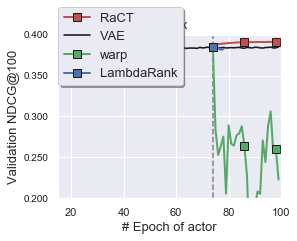

In [9]:
print("Now we'll add the critic coming off the center")


fig=plt.figure(figsize=(4,3))

plt.axvline(x=74, linewidth=1.5, color='gray', linestyle="--")
plt.plot(range(74, 100), [DATA['netflix-prize']['VAE']['actor']['ACTOR']['ndcg'][75]] + DATA['netflix-prize']['VAE']['critic']['AC']['ndcg'][:25], label='RaCT', marker= 's', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)
plt.plot(range(100), DATA['netflix-prize']['VAE']['actor']['ACTOR']['ndcg'], '-', label='VAE',  color='k', markevery=stride,lw=1.6,  mec='k', mew=1 , markersize=10)

### COMMENT THIS OUT TO GET NO WARP DATA IN PLOT ###
plt.plot(range(74, 100), [DATA['netflix-prize']['VAE']['actor']['ACTOR']['ndcg'][75]] + DATA['netflix-prize']['VAE']['warp_critic']['ALTERNATIVE_ERROR']['ndcg'][:25], label='warp', marker= 's', color='g', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)
lambdarank_netflix = DATA['netflix-prize']['VAE']['lambdarank_critic']['ALTERNATIVE_ERROR']['ndcg']
plt.plot(range(74, 75+len(lambdarank_netflix)), [DATA['netflix-prize']['VAE']['actor']['ACTOR']['ndcg'][75]] + lambdarank_netflix, label='LambdaRank', marker= 's', color='b', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)

print(f"Number of lambdarank netflixes: {len(lambdarank_netflix)}")


plt.title("Netflix", fontsize=13)
# plt.title("NDCG@100 on netflix-prize, with/without critic", fontsize=20)
leg = plt.legend(fontsize=13, shadow=True, loc=(0.002, 0.69))

plt.grid('on')
plt.xlabel('# Epoch of actor', fontsize=13)
plt.ylabel('Validation NDCG@100', fontsize=13)

plt.yticks((0.38, 0.383, 0.386, 0.389, 0.392), ('0.38', '0.383', '0.386', '0.389', '0.392'), color='k', size=10)
### SWITCH "YTICKS" line TO GET NON-WARP AXES ###
plt.yticks((0.200, 0.250, 0.300, 0.350, 0.400), ('0.200', '0.250', '0.300', '0.350', '0.400'), color='k', size=10)


plt.xlim(15, 100)

### SWITCH "YLIM" LINE TO GET NON-WARP AXES ###
# plt.ylim(0.379, 0.392)
plt.ylim(0.200, 0.400)

plt.show()
fig.savefig('improve_ndcg_netflix.pdf', bbox_inches='tight')


In [10]:
# MSD IS DIFFERENT, BECAUSE ITS DOWNLOADED FROM TENSORBOARD....

with open("./data/msd/VAE/actor_training.json", "r") as f:
    first_part = json.loads(f.read())

with open("./data/msd/VAE/critic_training.json", "r") as f:
    second_part = json.loads(f.read())

with open("./data/msd/VAE/warp_critic_training.json", "r") as f:
    warp_critic_msd = json.loads(f.read())['ALTERNATIVE_ERROR']['ndcg']

with open("./data/msd/VAE/lambdarank_critic_training.json", "r") as f:
    lambdarank_critic_msd = json.loads(f.read())['ALTERNATIVE_ERROR']['ndcg']

    
first_part = [e[2] for e in first_part]
second_part = [e[2] for e in second_part]

print(len(warp_critic_msd))
print(len(lambdarank_critic_msd))

13
2


Now we'll add the critic coming off the center


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


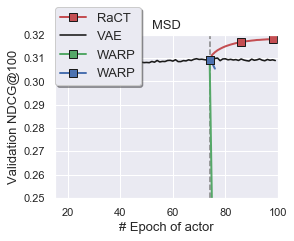

In [13]:
print("Now we'll add the critic coming off the center")

fig=plt.figure(figsize=(4,3))

plt.axvline(x=74, linewidth=1.5, color='gray', linestyle="--")
plt.plot(range(74, 100), [first_part[75]] + second_part[50:75], label='RaCT', marker= 's', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)
plt.plot(range(100), first_part, label='VAE',  color='k', markevery=stride,lw=1.6,  mec='k', mew=1 , markersize=10)
plt.plot(range(74, 75 + len(warp_critic_msd)), [first_part[75]] + warp_critic_msd, label='WARP', marker= 's', color='g', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)
plt.plot(range(74, 75 + len(lambdarank_critic_msd)), [first_part[75]] + lambdarank_critic_msd, label='WARP', marker= 's', color='b', markevery=stride,lw=2,  mec='k', mew=1 , markersize=8)

# plt.ylim(0.37, 0.40)
# plt.title("NDCG@100 on MSD, with/without critic", fontsize=20)
plt.title("MSD", fontsize=13)
leg = plt.legend(fontsize=13, shadow=True, loc=(0.002, 0.69))

plt.grid('on')
plt.xlabel('# Epoch of actor', fontsize=13)
plt.ylabel('Validation NDCG@100', fontsize=13)

plt.xlim(15, 100)
# plt.ylim(0.30, 0.32)
plt.ylim(0.25, 0.32)

plt.show()
fig.savefig('improve_ndcg_msd.pdf', bbox_inches='tight')
